In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [3]:
entry_data = pd.read_csv('./ABC/entry_data.csv')
sales_data = pd.read_csv('./ABC/sales_data.csv')
item_data = pd.read_csv('./ABC/item_data.csv')
item_entry_data = pd.read_csv('./ABC/item_entry_data.csv')

In [4]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
temp_var = sales_data

In [6]:
temp_var['date'] = sales_data['결제일시'].str[:7]

In [7]:
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',', '')

In [8]:
temp_var['payment'] = sales_data['결제금액'].astype(int)

In [9]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,5000
...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02,-3500
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02,4500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02,-4500
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02,4000


In [10]:
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()

In [11]:
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int64

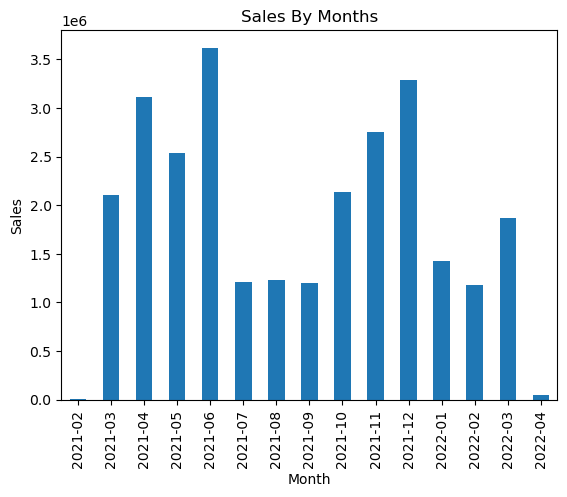

In [12]:
ax = payment_data.plot(kind='bar')

plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [13]:
items_count = temp_var[temp_var['판매수량']!=-1].value_counts()

In [14]:
items_count

결제일시              판매위치  상품명         결제방식  비고    판매수량  결제금액  고객              date     payment
2021-10-05 13:33  선불기1  치즈추가        현금    결제완료  1     500   customer803089  2021-10  500        4
                        라면          현금    결제완료  1     4000  customer803089  2021-10  4000       4
2021-10-07 10:05  선불기1  시럽추가        신용카드  결제완료  1     500   customer777135  2021-10  500        4
2021-06-19 21:02  선불기1  라면          신용카드  결제완료  1     4000  customer283589  2021-06  4000       4
2021-06-14 11:37  선불기1  치즈추가        신용카드  결제완료  1     500   customer950393  2021-06  500        3
                                                                                               ..
2021-06-13 12:59  선불기1  계란추가        신용카드  결제완료  1     500   customer339447  2021-06  500        1
2021-06-13 11:46  선불기1  새우볶음밥       신용카드  결제완료  1     5000  customer950393  2021-06  5000       1
2021-06-13 10:33  선불기1  김치볶음밥       신용카드  결제완료  1     5000  customer983308  2021-06  5000       1
2021-06-13 10:00  선불기1  김

In [15]:
items_count = pd.DataFrame(items_count)
items_count[:10]

0
결제일시             판매위치 상품명   결제방식 비고   판매수량 결제금액 고객             date    payment   
2021-10-05 13:33 선불기1 치즈추가  현금   결제완료 1    500  customer803089 2021-10 500      4
                      라면    현금   결제완료 1    4000 customer803089 2021-10 4000     4
2021-10-07 10:05 선불기1 시럽추가  신용카드 결제완료 1    500  customer777135 2021-10 500      4
2021-06-19 21:02 선불기1 라면    신용카드 결제완료 1    4000 customer283589 2021-06 4000     4
2021-06-14 11:37 선불기1 치즈추가  신용카드 결제완료 1    500  customer950393 2021-06 500      3
2021-03-23 13:41 선불기1 계란추가  신용카드 결제완료 1    500  customer556974 2021-03 500      3
2021-11-29 19:20 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer975556 2021-11 5000     3
2021-06-16 12:17 선불기1 라면    신용카드 결제완료 1    4000 customer996256 2021-06 4000     3
2021-08-22 17:12 선불기1 라면    신용카드 결제완료 1    4000 customer439220 2021-08 4000     3
2021-04-25 18:31 선불기1 김치볶음밥 신용카드 결제완료 1    5000 customer304481 2021-04 5000     3

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = "AppleGothic"

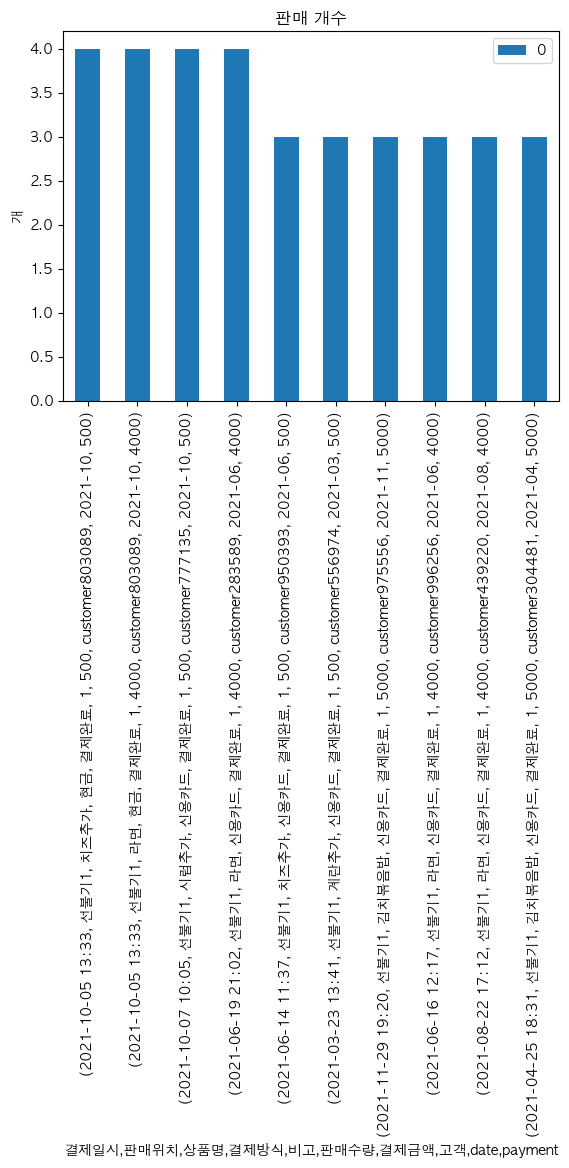

In [17]:
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

In [18]:
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04,5000
...,...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,-3500,NaN,2021-02,-3500
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,4500,NaN,2021-02,4500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,-4500,NaN,2021-02,-4500
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,4000,NaN,2021-02,4000


In [19]:
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum()

In [20]:
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              108500
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           62500
Name: payment, Length: 100, dtype: int64

In [21]:
items_payment = temp_var['payment'].groupby(temp_var['상품명'][temp_var['판매수량']!=-1]).sum()

In [22]:
items_payment

상품명
(면)계란추가-국물라면           5000
(면)계란후라이 추가-불닭/짜장     20000
(면)치즈추가               10500
(밥)계란후라이 추가            3000
(밥)슈레드치즈추가             4500
                      ...  
한돈간장불고기덮밥            112500
한돈고추장불고기덮밥           127500
허니밀크쉐이크              114000
헤이즐넛라떼(HOT)            9000
헤이즐넛라떼(ICE)           67500
Name: payment, Length: 100, dtype: int64

In [23]:
items_payment = items_payment.sort_values(ascending=False)
items_payment[:10]

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: payment, dtype: int64

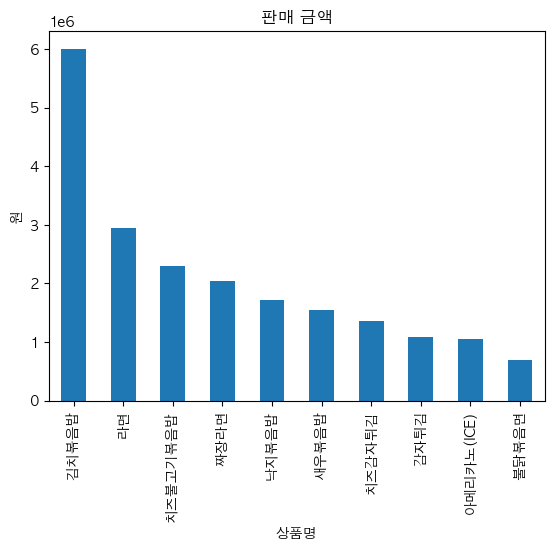

In [24]:
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

In [25]:
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [26]:
temp_var['금액'] = temp_var['금액'].astype(int)

In [27]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum()
tickets

요금제명
18시이후 무제한           1330500
1시간                   90000
1시간 요금제               14000
3시간                   21000
기간권                       0
무제한 입장권             1568600
무제한(일반요금)              6000
무제한(한국대생)             14000
시간 요금제(1시간당)          25000
시간권                       0
시간요금제                 12300
시간요금제(1시간)          2665500
시간요금제(1시간당)           22500
시간요금제(3시간)          2042000
심야-조조무제한            6221000
심야-조조무제한(06시까지)    11600000
이용권                       0
입장권(종일권)           23570500
조조무제한                693000
종일요금제                233000
한국대생 무제한 입장권        5207500
한국대생 입장권(종일권)      70037000
Name: 금액, dtype: int64

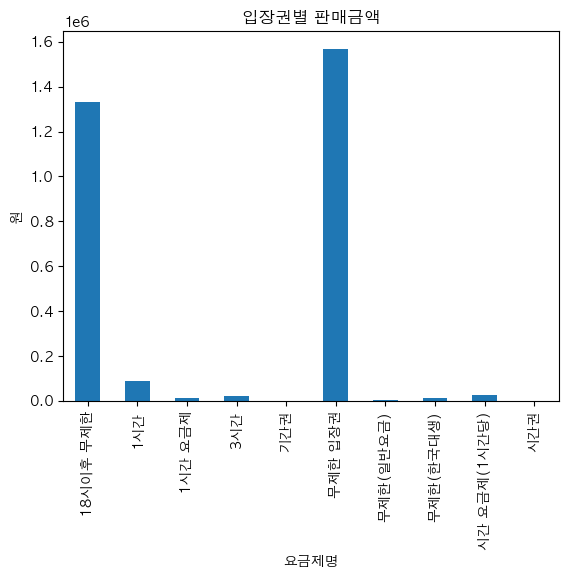

In [28]:
# 집계 결과 시각화하기
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()